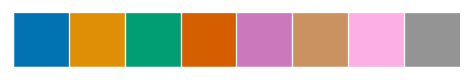

In [2]:
#Import stuff
%matplotlib inline
import base64
from collections import namedtuple, OrderedDict
from datetime import datetime
import glob
import io
import os
import sys
os.environ['PROJ_LIB']=os.path.join(os.environ['HOME'],'.anaconda3','share','proj')




from astropy.stats import LombScargle
import astropy.units as u
from brewer2mpl import qualitative
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
import h5py
from IPython.display import HTML
import matplotlib as mpl
from matplotlib import animation, rc
from matplotlib.colors import LightSource
from matplotlib.colorbar import cm as colmap2
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, cm as colmap
import mpld3
from netCDF4 import Dataset as nc, num2date, MFDataset as mc, date2num
import numpy as np
import palettable as colortable
from palettable.mycarta import LinearL_20, CubeYF_20
from palettable.colorbrewer.qualitative import Paired_12
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import pytz
import seaborn as sns
from scipy import signal
import tempfile
import xarray as xr

from DataFrame import *
from tint.visualization import make_mp4_from_frames, plot_traj

sns.set()
fontsize = 30
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'
plt.style.use("seaborn-talk")

pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("darkgrid", {'axes.grid':True, 'ticks':True})
sns.set_context('talk')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
pal

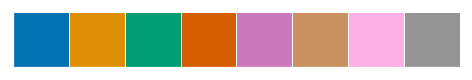

In [3]:
#Import stuff
%matplotlib inline
import base64
from collections import namedtuple, OrderedDict
from datetime import datetime
import glob
import io
import os
import sys
os.environ['PROJ_LIB']=os.path.join(os.environ['HOME'],'.anaconda3','share','proj')




from astropy.stats import LombScargle
import astropy.units as u
from brewer2mpl import qualitative
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
import h5py
from IPython.display import HTML
import matplotlib as mpl
from matplotlib import animation, rc
from matplotlib.colors import LightSource
from matplotlib.colorbar import cm as colmap2
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, cm as colmap
import mpld3
from netCDF4 import Dataset as nc, num2date, MFDataset as mc, date2num
import numpy as np
import palettable as colortable
from palettable.mycarta import LinearL_20, CubeYF_20
from palettable.colorbrewer.qualitative import Paired_12
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import pytz
import seaborn as sns
from scipy import signal
import tempfile
import xarray as xr

from DataFrame import *
from tint.visualization import make_mp4_from_frames, plot_traj
from TintTrack import cold_pool_grids, creat_tracks, get_mintime
from tint import Cell_tracks, animate, helpers

sns.set()
fontsize = 30
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'


pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("whitegrid", {'axes.grid':True, 'ticks':True})
plt.style.use("seaborn-paper")
sns.set_context('paper')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
pal

In [50]:
data_dir = '/home/unimelb.edu.au/mbergemann/Data/Extremes/UM/darwin/RA1T/'
data_file = os.path.join(data_dir, 'um-0p44km-11100000-surf_20061112_0000-20061112_1200-native.nc')
rain_file = os.path.join(data_dir, 'um-0p44km-11100000-rain_20061112_0000-20061112_1200-native.nc')

In [51]:
um_dset = xr.open_dataset(data_file)

In [65]:
time = pd.DatetimeIndex(um_dset.t.values).tz_localize(utc).tz_convert(timezone).tz_localize(None).round('5 min')
lon = um_dset.longitude.values
lat = um_dset.latitude.values
time_2 = time.tz_localize(timezone).tz_convert(utc).tz_localize(None).to_pydatetime()
with nc(data_file) as f:
    slices = helpers.get_times(f.variables['t'], time_2[0], time_2[-1])
slices

[(0, 107)]

In [30]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
topocmap = plt.cm.gist_earth
topocmap.set_bad('w', alpha=0)
#First the greater area map
geodataf = os.path.join(os.getenv('HOME'), 'Data', 'Extremes', 'UM')
with nc(os.path.join(geodataf,'topo_2.nc')) as topof:
    Gtopo=np.ma.masked_equal(topof.variables['topo'][:],0)
    Gtopolon=topof.variables['longitude'][:]
    Gtopolat=topof.variables['latitude'][:]
#Now only the tiwi-islands manp
with nc(os.path.join(geodataf,'Topo.nc')) as topof:
    topo=np.ma.masked_equal(topof.variables['topo'][:],0)
    topolon=topof.variables['longitude'][:]
    topolat=topof.variables['latitude'][:]
ls = LightSource(azdeg=315, altdeg=45)
#tmap.pcolormesh(topolon, topolat, ls.hillshade(topo[:], vert_exag=1), cmap= topocmap)

In [114]:
slices
cmap.set_gamma(1)
i1, i2 = np.argmin(np.fabs(topolat - min(lat))), np.argmin(np.fabs(topolat - max(lat)))+1 
j1, j2 = np.argmin(np.fabs(topolon - min(lon))), np.argmin(np.fabs(topolon - max(lon)))+1 

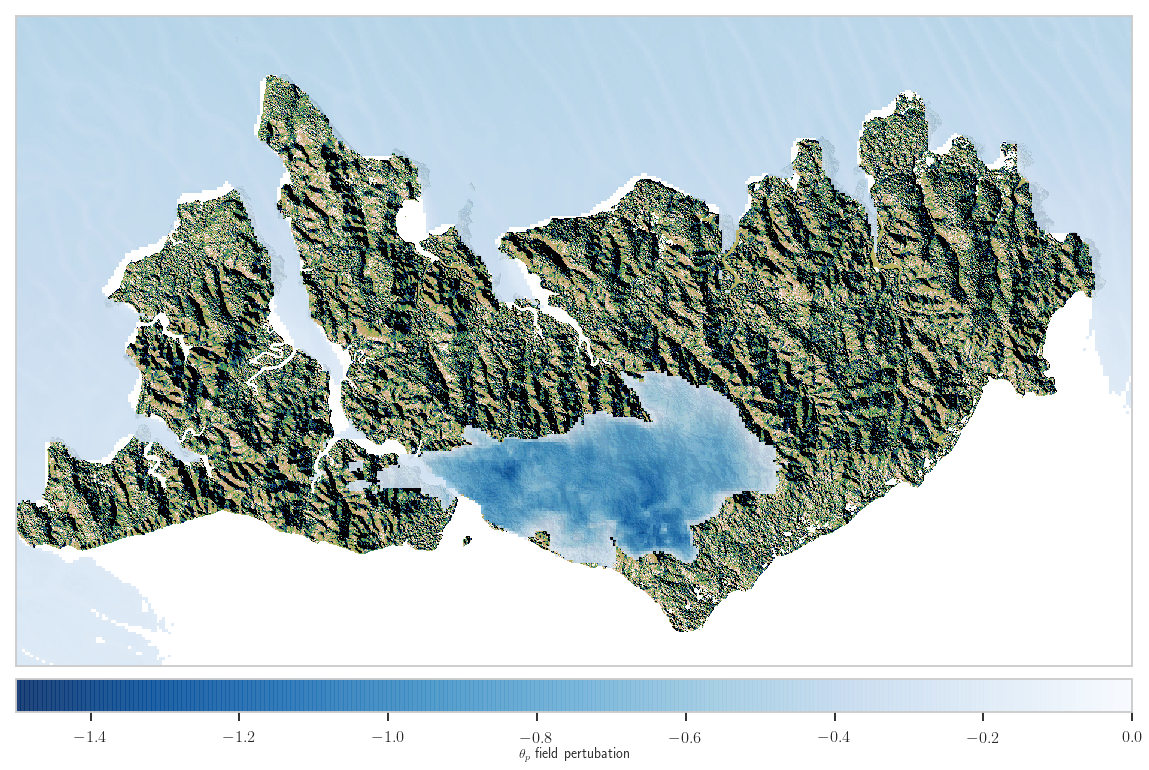

In [121]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ls = LightSource(azdeg=315, altdeg=45)
dd = np.ma.masked_greater(-data['data'], -0.2)
M = Basemap(llcrnrlat=min(lat), llcrnrlon=min(lon), urcrnrlat=max(lat), urcrnrlon=max(lon), 
            resolution='c', area_thresh=1, ax=ax)
M.imshow(ls.hillshade(topo[i1:i2,j1:j2].filled(np.nan), vert_exag=1), cmap= topocmap, origin='lower');
#im = M.pcolormesh(lon, lat, dd, vmax=0, vmin=-1.5, cmap=cmap)
im = M.imshow(dd, vmax=0, vmin=-1.5, cmap=cmap, alpha=0.9, origin='lower')
#M.drawcoastlines()
cbar = M.colorbar(im, location='bottom')
cbar.set_label('$\\theta_p$ field pertubation', fontsize=14)

In [224]:
m = Basemap(llcrnrlat=min(lat), llcrnrlon=min(lon), urcrnrlat=max(lat), urcrnrlon=max(lon),
                            resolution='f', area_thresh=0)

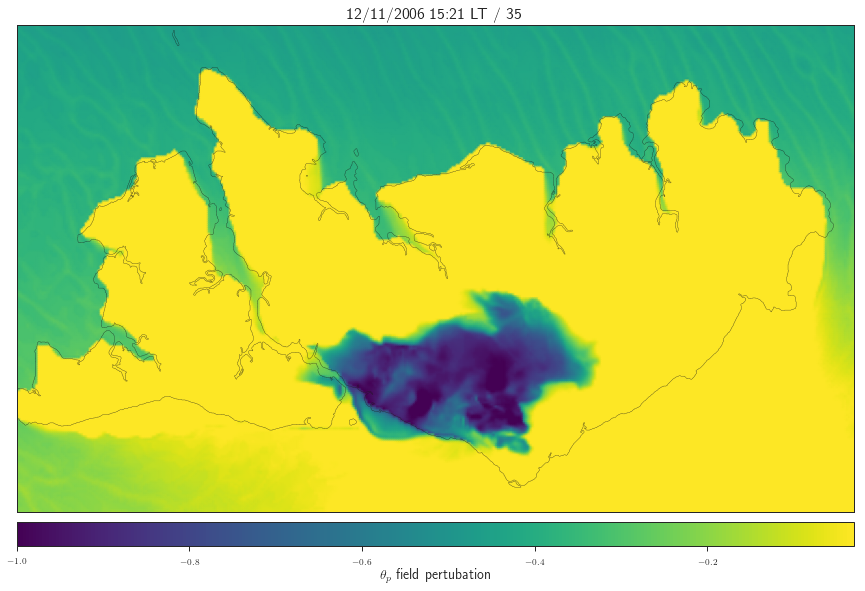

In [302]:
from IPython import display as disp
import time as tt
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

first = True
vmin, vmax = 0, 0
cmap = colmap2.viridis
#cmap.set_gamma(1)
#cmap.set_bad('w', alpha=0)
#cmap.set_over('w', alpha=0)
T = 15
while True:
    try:    
        for s in [(T, 100)]:
            gr = (i for i in cold_pool_grids(nc(data_file), nc(rain_file), s, lon, lat, thresh=-2))
            for data in gr:
                ts = pd.Timestamp(data['time']).tz_localize(utc).tz_convert(timezone).tz_localize(None)
                #print(data['data'][0].mean(), data['data'][0].min(), data['data'][0].max(), data['data'][0].std())
                #break
                if first:
                    im = m.pcolormesh(lon, lat, -data['data'], vmax=-0.03, vmin=-1., cmap=cmap, shading='gouraud')
                    cbar = m.colorbar(im, location='bottom')
                    cbar.set_label('$\\theta_p$ field pertubation', fontsize=14)
                    m.drawcoastlines(linewidth=0.3)
                    first = False
                else:
                    im.set_array(-data['data'].ravel())
                ax.set_title(ts.strftime('%_d/%_m/%Y %H:%M LT')+' / %i'%T, fontsize=16)
                fig.canvas.draw()
                disp.clear_output(wait=True)
                disp.display(plt.gcf())
                tt.sleep(0.2)
                T += 1
                
    except KeyboardInterrupt:
        da = ax.cla(), fig.clf(), plt.close()
        break
        
#d = disp.clear_output(wait=True)
#d= disp.display(plt.gcf())

In [187]:
gr = (i for i in cold_pool_grids(nc(data_file), nc(rain_file), [30, 39] , lon, lat, thresh=-2))
data1 = next(gr)
ts1 = pd.Timestamp(data1['time']).tz_localize(utc).tz_convert(timezone).tz_localize(None)
for dd in gr:
    data2=dd
ts2 = pd.Timestamp(data2['time']).tz_localize(utc).tz_convert(timezone).tz_localize(None)   

In [251]:
sns.set_style("white", {'axes.grid':True, 'ticks':True})
plt.style.use("seaborn-paper")
sns.set_context('paper')

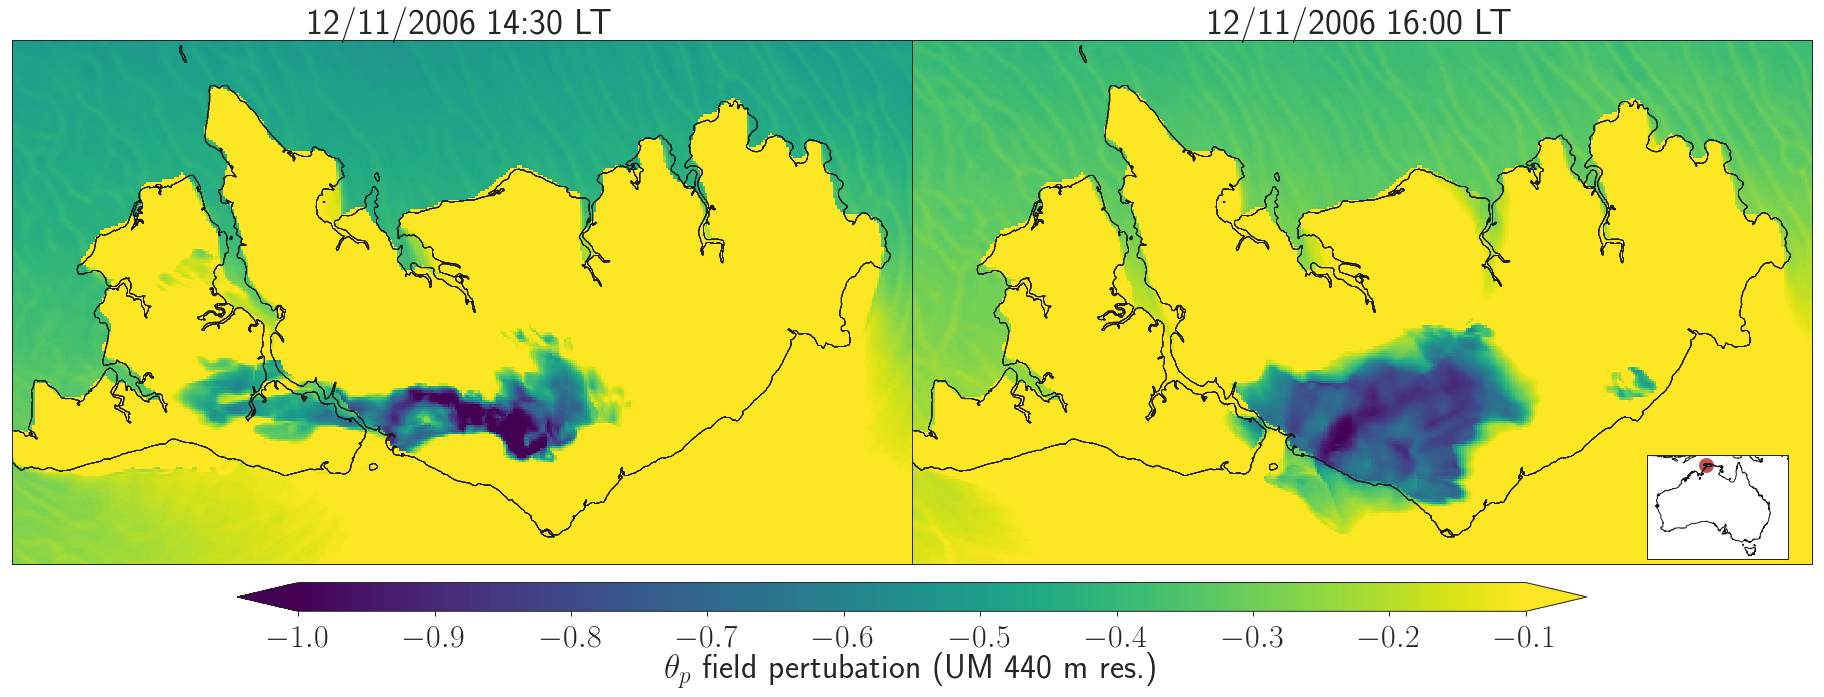

In [299]:
fig=plt.figure(figsize=(25,10))
ax = fig.subplots(1,2, sharey=True, sharex=True)

vmin, vmax = -1, -0.1
ax[0].set_title(ts1.strftime('%_d/%_m/%Y %H:%M LT'), fontsize=36)
ax[1].set_title(ts2.strftime('%_d/%_m/%Y %H:%M LT'), fontsize=36)
im1 = m.pcolormesh(lon, lat,  -data1['data'], vmax=vmax, vmin=vmin, cmap=cmap, ax=ax[0])
im2 = m.pcolormesh(lon, lat,  -data2['data'], vmax=vmax, vmin=vmin, cmap=cmap, ax=ax[1])
for i in range(5):
    m.drawcoastlines(linewidth=0.8, ax=ax[0])
    m.drawcoastlines(linewidth=0.8, ax=ax[1])
cax = fig.add_axes([0.125, 0.07, 0.75, 0.04]) 
cbar = fig.colorbar(im2, cax=cax, orientation='horizontal', extend='both')
cbar.set_label('$\\theta_p$ field pertubation (UM 440 m res.)', fontsize=34)
cbar.ax.tick_params(labelsize=32)
fig.subplots_adjust(bottom=0, top=1, left=0, right=1, wspace=0, hspace=0)
axins2 = inset_axes(ax[-1], width='20%', height='20%', loc=4)
lat_0, lon_0 = lat[int(len(lat)/2)], lon[int(len(lon)/2)]
aus = Basemap(llcrnrlat=-45, llcrnrlon=110, urcrnrlat=-8, urcrnrlon=160,
              resolution='l', ax=axins2)
aus.drawcoastlines(color='k', linewidth=1)
aus.scatter(*aus(lon_0, lat_0), marker='o',color='r', s=200);
fig.savefig('/home/mbergemann/Todds_coldpools.png', dip=300, format='png', bbox_inches='tight')

In [208]:
cbar.get_ticks()

array([-1. , -0.8, -0.6, -0.4, -0.2])

In [144]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe98fb16828>,
      dtype=object)